# Object detection with Detectron2

![](https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg)

## 1) Install detectron2 (if running on Colab with GPU enabled)

Check torch and cuda version then install the correponding pre-built detectron2: https://detectron2.readthedocs.io/en/latest/tutorials/install.html

In [3]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version


2.3.0+cpu False
gcc (GCC) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [10]:
!python -m pip install git+https://github.com/facebookresearch/detectron2.git
#!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

  Cloning https://github.com/facebookresearch/detectron2.git to c:\users\61406\appdata\local\temp\pip-req-build-u8htwege
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5c380fdfc62b0124204155d6be3b1016e3dadb2d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/50.2 kB ? eta -:--:--
     ---------------------------------------- 50.2/50.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/77.1 kB ? eta -:--:--
     ---------------------------------------- 77.1/77.1 kB ? eta 0:00:00
     ---------------------------------------- 0.0/117.0 kB ? eta -:--:--
     ---------------------------------------- 117.0/117.0 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached 

  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git 'C:\Users\61406\AppData\Local\Temp\pip-req-build-u8htwege'


## 2) Install detectron2 in local (if not using Colab)

Install Detectron2 in Windows, Linux with Anaconda and GPU-enabled:

https://medium.com/@yogeshkumarpilli/how-to-install-detectron2-on-windows-10-or-11-2021-aug-with-the-latest-build-v0-5-c7333909676f

https://medium.com/@sujoydebnath.92/installing-detectron2-with-anaconda-and-cuda-on-linux-7b710663326c

https://anaconda.org/conda-forge/detectron2 


Installing Detectron2 natively for Mac M1 Pro / Apple silicon (use Miniforge) (tested):

https://medium.com/@hakon.hukkelas/installing-detectron2-natively-for-mac-m1-pro-apple-silicon-a89517f1c913 

## 3) Inference with pre-trained model

#### Import packages

In [11]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2

We first need to download a image to make predictions on.

In [12]:
# !wget https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg -O oxford_street.jpg
import requests

image_url = "https://cdn.ps.emap.com/wp-content/uploads/sites/3/2017/12/Oxford_Street.jpg"
img_data = requests.get(image_url).content
with open('oxford_street.jpg', 'wb') as handler:
    handler.write(img_data)

import os
os.stat('oxford_street.jpg')

os.stat_result(st_mode=33206, st_ino=27303072741073670, st_dev=314987226, st_nlink=1, st_uid=0, st_gid=0, st_size=179209, st_atime=1714924120, st_mtime=1714924120, st_ctime=1714872353)

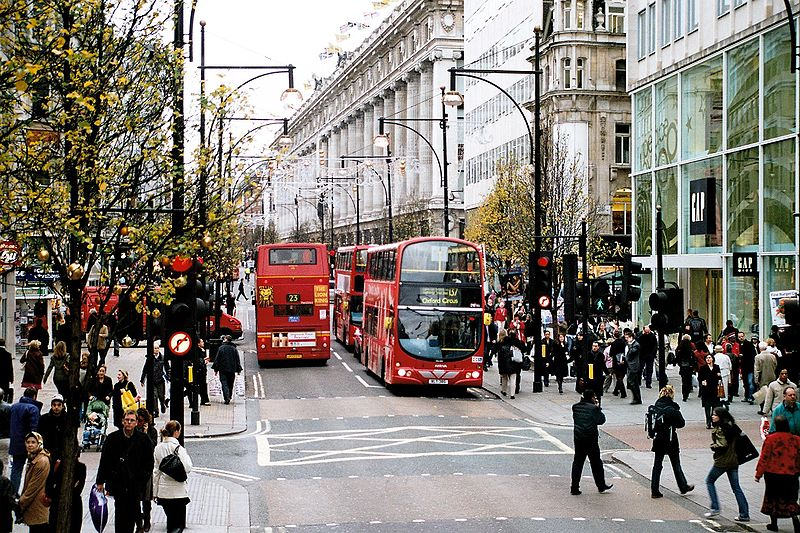

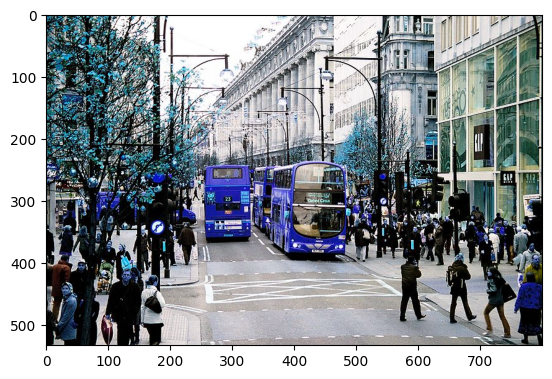

In [13]:
%matplotlib inline
im = cv2.imread("oxford_street.jpg")
plt.imshow(im)

from IPython.display import Image
Image(filename='oxford_street.jpg') 

#### Import the model and the config

Your turn to work now ! 

- for example, you can choose Faster_rcnn pretrained (its signature is `"COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"` in the detectron model zoo)

In [20]:
# Create config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
#cfg.MODEL.DEVICE = 'cuda'
cfg.MODEL.DEVICE = 'cpu'

In [21]:
# Generate model and Create predictor
predictor = DefaultPredictor(cfg)

model_final_f6e8b1.pkl: 243MB [00:19, 12.4MB/s]                              


In [22]:
# Make prediction
outputs = predictor(im)

c:\Users\61406\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


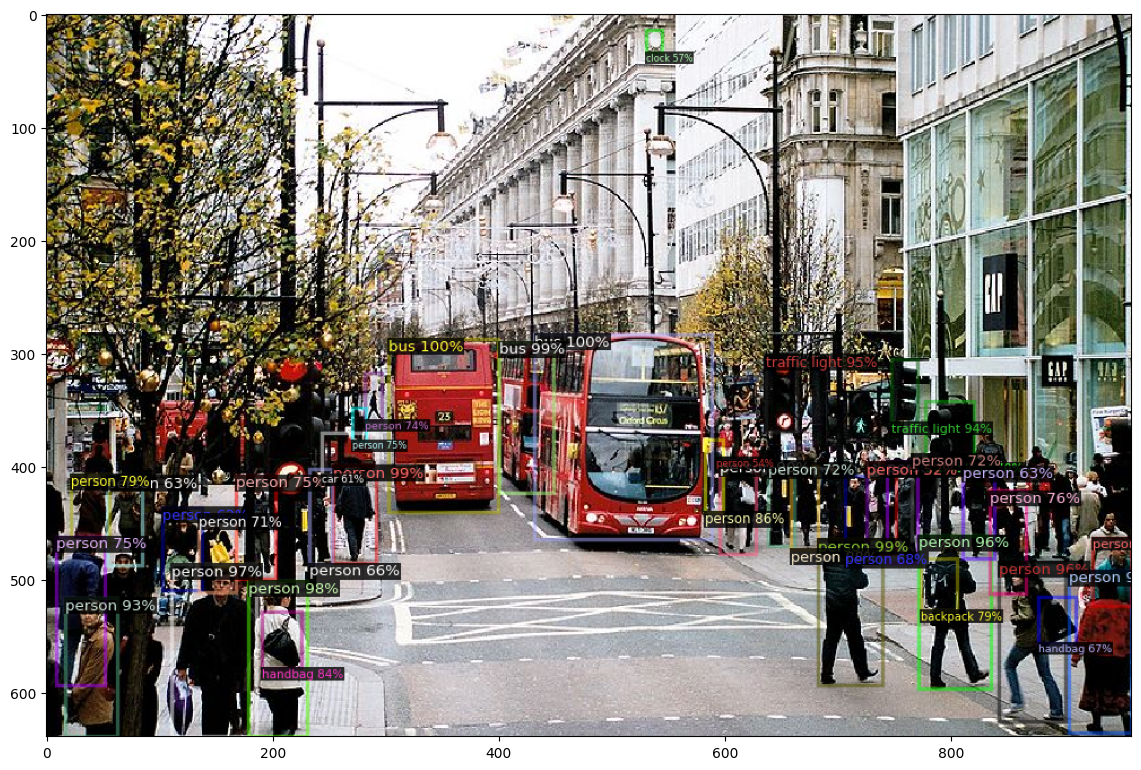

In [24]:
# Visualize the bounding boxes on the image
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

**\[BONUS\]** Feel free to :
- Test the faster-RNN we just used on other images of your choosing
- Test some of the other algorithms available in the [model zoo](https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md) and see how they perform